<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Deep-Neural-Network/blob/main/Deep_Neural_Network_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
minist = tf.keras.datasets.fashion_mnist

In [10]:
(training_img,training_label),(test_img,test_label) = minist.load_data()

In [7]:
#naming labels
class_name = ['T-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [8]:
print(training_img.shape)
print(len(training_label))

(60000, 28, 28)
60000


In [11]:
print(test_img.shape)
print(len(test_label))

(10000, 28, 28)
10000


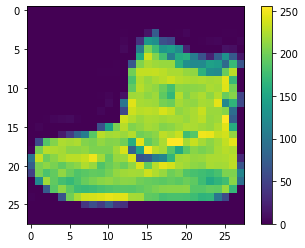

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(training_img[0])
plt.colorbar() #to show colorar
plt.grid(False) #grid for pixel
plt.show()

In [13]:
#normalization
training_img = training_img/255.0
test_img = test_img/255.0

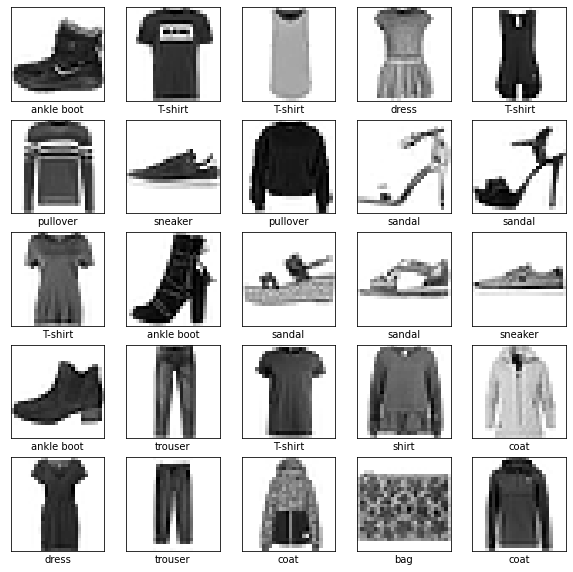

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_img[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[training_label[i]])

plt.show()

In [15]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128, activation= 'relu'),
     keras.layers.Dense(10, activation= 'softmax')
     
    ]
)

In [16]:
from tensorflow.python import metrics
from tensorflow.python.ops.gradients_impl import optional_grad
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(training_img,training_label,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4928 - accuracy: 0.8260
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3771 - accuracy: 0.8633
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3397 - accuracy: 0.8764
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3145 - accuracy: 0.8845
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2958 - accuracy: 0.8910
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - accuracy: 0.8971
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2692 - accuracy: 0.8998
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2572 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2481 - accuracy: 0.9068
Epoch 10/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0

In [17]:
test_loss, test_acc = model.evaluate(test_img, test_label, verbose = 2)
print('Test accuracy',test_acc)

313/313 - 1s - loss: 0.3619 - accuracy: 0.8814 - 879ms/epoch - 3ms/step
Test accuracy 0.8813999891281128


In [18]:
import numpy as np
predict = model.predict(test_img)
np.argmax(predict[0])

313/313 [==============================] - 1s 2ms/step


9